In [1]:
# Import required packages
import pandas as pd
import numpy as np

import dash
from dash import dcc
from dash import html
from dash import no_update

import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output, State

import warnings
warnings.simplefilter(action='ignore')

# Tasks

As a data analyst, you have been given a task to monitor and report US domestic airline flights performance. Goal is to analyze the performance of the reporting airline to improve flight reliability thereby improving customer reliability.
Below are the key report items,
<ol>
<li>• Yearly airline performance report  </li>
<li> Yearly average flight delay statistics </li>
</ol>
    

NOTE: Year range is between 2005 and 2020.
Components of the report items

A. Yearly airline performance report,
For the chosen year provide,
<ol>       
<li>Number of flights under different cancellation categories using bar chart</li>
<li> Average flight time by reporting airline using line chart. </li>
<li> Percentage of diverted airport landings per reporting airline using pie chart.</li>
<li> Number of flights flying from each state using choropleth map. </li>
<li> Number of flights flying to each state from each reporting airline using treemap chart.</li>
</ol>
    B. Yearly average flight delay statistics
       For the chosen year provide,
       <ol> 
        <li>◦ Monthly average carrier delay by reporting airline for the given year. </li>
        <li>◦ Monthly average weather delay by reporting airline for the given year. </li>
        <li>◦ Monthly average national air system delay by reporting airline for the given year. </li>
        <li>◦ Monthly average security delay by reporting airline for the given year. </li>
        <li>◦ Monthly average late aircraft delay by reporting airline for the given year.</li>
       </ol>
       NOTE: You have worked created the same dashboard components in Flight Delay Time Statistics Dashboard section. We will be reusing the same.
       
       Expected Layout
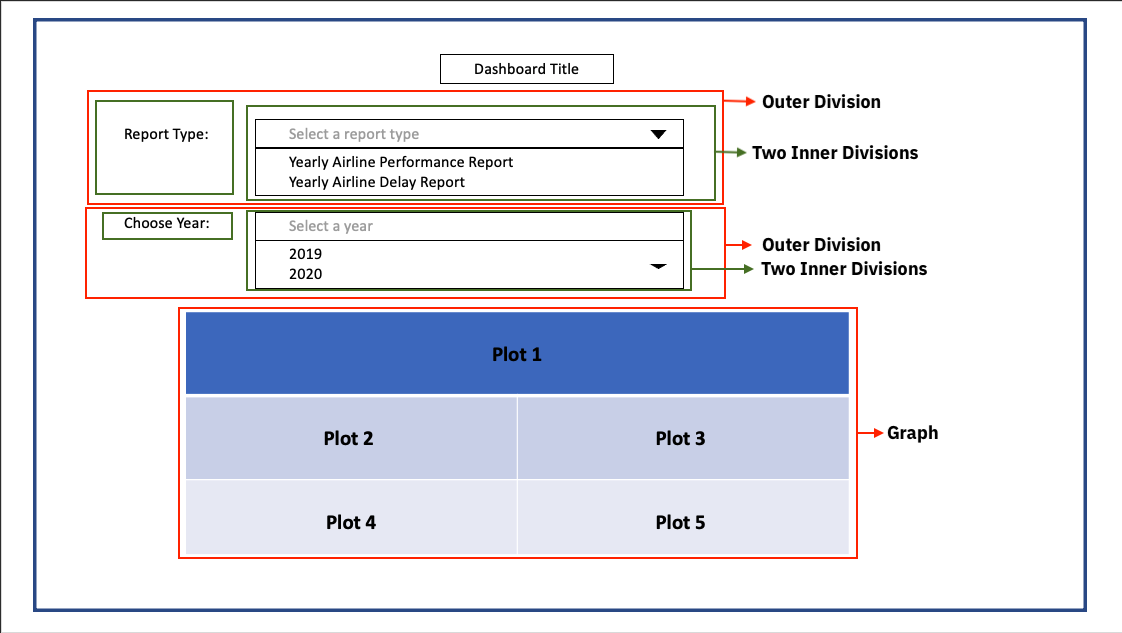

Requirements to create the expected result
<ol>
    <li>• Two dropdown menus: For choosing report type and year </li>
    <li>• Each dropdown will be designed as follows:</li>
        <li>◦ An outer division with two inner divisions (as shown in the expected layout) </li>
        <li>◦ One of the inner divisions will have information about the dropdown and the other one is dropdown.</li>
    <li>• Layout for adding graphs. </li>
   <li> • Callback function to compute data, create graph and return to the layout. </li>
</ol>

#### Load Data

In [2]:
# Load Data Set
airline_data = pd.read_csv('airline_data_original.csv')
airline_data.head()

,Unnamed: 0.1,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,118824,1993,3,9,25,6,1993-09-25,UA,19977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,634825,1994,4,11,12,6,1994-11-12,HP,19991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dashboard

In [ ]:
# Create a dash application
app = dash.Dash(__name__)

# REVIEW1: Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read the airline data into pandas dataframe
airline_data

# List of years 
year_list = [i for i in range(2005, 2021, 1)]

"""Compute graph data for creating yearly airline performance report 

Function that takes airline data as input and create 5 dataframes based on the grouping condition to be used for plottling charts and grphs.

Argument:
     
    df: Filtered dataframe
    
Returns:
   Dataframes to create graph. 
"""
def compute_data_choice_1(df):
    # Cancellation Category Count
    bar_data = df.groupby(['Month','CancellationCode'])['Flights'].sum().reset_index()
    # Average flight time by reporting airline
    line_data = airline_data.groupby(['Reporting_Airline'])['Flights'].sum().reset_index()
    # Diverted Airport Landings
    div_data = df[df['DivAirportLandings'] != 0.0]
    # Source state count
    map_data = df.groupby(['OriginState'])['Flights'].sum().reset_index()
    # Destination state count
    tree_data = df.groupby(['DestState', 'Reporting_Airline'])['Flights'].sum().reset_index()
    return bar_data, line_data, div_data, map_data, tree_data


"""Compute graph data for creating yearly airline delay report

This function takes in airline data and selected year as an input and performs computation for creating charts and plots.

Arguments:
    df: Input airline data.
    
Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.
"""
def compute_data_choice_2(df):
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late


# Application layout
app.layout = html.Div(children=[ 
                                # Add title to the dashboard
                                html.H1('US Domestic Airline Flights Performance', style={'textAlign':'center', 'color':'#503D36', 'font-size':24}
                                       ),
    
                                # REVIEW2: Dropdown creation
                                # Create an outer division 
                                html.Div([
                                    # Add an division
                                    html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div([html.H2('Report Type:', style={'margin-right': '2em'}),
                                                 ]
                                                ),
                                        # Add a dropdown
                                        dcc.Dropdown(id='input-type', 
                                                         options=[{'label': 'Yearly Airline Performance Report', 'value': 'OPT1'},
                                                                  {'label': 'Yearly Airline Delay Report', 'value': 'OPT2'}
                                                                 ],
                                                                 placeholder='Select a report type',
                                                                 style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}
                                                    ), 
                                    # Place them next to each other using the division style
                                            ], style={'display':'flex'}
                                            ),
                                
                                    
                                   # Add next division 
                                   html.Div([
                                       # Create an division for adding dropdown helper text for choosing year
                                        html.Div([html.H2('Choose Year:', style={'margin-right': '2em'})]
                                                ),

                                        dcc.Dropdown(id='input-year', 
                                                     # Update dropdown values using list comphrehension
                                                     options=[{'label': i, 'value': i} for i in year_list],
                                                     placeholder="Select a year",
                                                     style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}
                                                    ),
                                            # Place them next to each other using the division style
                                            ], style={'display': 'flex'}
                                            ),  
                                        ]),
                                
                                # Add Computed graphs
                                # REVIEW3: Observe how we add an empty division and providing an id that will be updated during callback
                                html.Div([ ], id='plot1'),
    
                                html.Div([
                                        html.Div([ ], id='plot2'),
                                        html.Div([ ], id='plot3')
                                         ], style={'display': 'flex'}
                                        ),
                                
                                # TAdd a division with two empty divisions inside. See above disvision for example.
                                html.Div([
                                        html.Div([ ], id='plot4'),
                                        html.Div([ ], id='plot5')
                                         ], style={'display': 'flex'}
                                        ),
                                ]
                        )

# Callback function definition
# TASK4: Add 5 ouput components
@app.callback( [Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children'),
               Output(component_id='plot3', component_property='children'),
               Output(component_id='plot4', component_property='children'),
               Output(component_id='plot5', component_property='children')],
              
               [Input(component_id='input-type', component_property='value'),
                Input(component_id='input-year', component_property='value')],
               # REVIEW4: Holding output state till user enters all the form information. In this case, it will be chart type and year
               [State("plot1", 'children'), State("plot2", "children"),
                State("plot3", "children"), State("plot4", "children"),
                State("plot5", "children")
               ])
# Add computation to callback function and return graph
def get_graph(chart, year, children1, children2, c3, c4, c5):
      
        # Select data
        df =  airline_data[airline_data['Year']==int(year)]
       
        if chart == 'OPT1':
            # Compute required information for creating graph from the data
            bar_data, line_data, div_data, map_data, tree_data = compute_data_choice_1(df)
            
            # Number of flights under different cancellation categories
            bar_fig = px.bar(bar_data, x='Month', y='Flights', color='CancellationCode', title='Monthly Flight Cancellation')
            
            # TASK5: Average flight time by reporting airline
            line_fig = px.line(line_data, x='Reporting_Airline', y='Flights', title='Total flights (by year) by airline')
            
            # Percentage of diverted airport landings per reporting airline
            pie_fig = px.pie(div_data, values='Flights', names='Reporting_Airline', title='% of Diverted Airport Landings by reporting airline')
            
            # REVIEW5: Number of flights flying from each state using choropleth
            map_fig = px.choropleth(map_data,  # Input data
                    locations='OriginState', 
                    color='Flights',  
                    hover_data=['OriginState', 'Flights'], 
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='GnBu',
                    range_color=[0, map_data['Flights'].max()]) 
            map_fig.update_layout(
                    title_text = 'Number of flights from origin state', 
                    geo_scope='usa') # Plot only the USA instead of globe
            
            # TASK6: Number of flights flying to each state from each reporting airline
            tree_fig = px.treemap(tree_data, path=['DestState','Reporting_Airline'],
                                 values='Flights',
                                 color='Flights',
                                 color_continuous_scale='RdBu',
                                 title='Flight count by Airline to destination state')
            
            
            # REVIEW6: Return dcc.Graph component to the empty division
            return [dcc.Graph(figure=tree_fig), 
                    dcc.Graph(figure=pie_fig),
                    dcc.Graph(figure=map_fig),
                    dcc.Graph(figure=bar_fig),
                    dcc.Graph(figure=line_fig)
                   ]
        else:
            # REVIEW7: This covers chart type 2 and we have completed this exercise under Flight Delay Time Statistics Dashboard section
            # Compute required information for creating graph from the data
            avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_data_choice_2(df)
            
            # Create graph
            carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrier delay time (minutes) by airline')
            weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
            nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
            sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
            late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
            
            return[dcc.Graph(figure=carrier_fig), 
                   dcc.Graph(figure=weather_fig), 
                   dcc.Graph(figure=nas_fig), 
                   dcc.Graph(figure=sec_fig), 
                   dcc.Graph(figure=late_fig)
                  ]


# Run the app
if __name__ == '__main__':
    app.run_server()